In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
def loadCleanData(fname):
    df = pd.read_csv(fname)
    
    # regularize capitalization and remove leading space in column headings
    fix_cols = {s : s.lower().strip() for s in df.columns.to_list()}
    df.rename(columns = fix_cols, inplace=True)
    
    # convert pixels from strings to lists of integers
    df['pixels'] = df['pixels'].apply(lambda x: [int(i) for i in x.split()])
    
    df.drop('usage', axis=1, inplace=True)
    
    return df

In [70]:
df = loadCleanData('data/icml_face_data.csv')
df.head()

,emotion,pixels
0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4..."
1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ..."
2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ..."
3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2..."
4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23..."


In [50]:
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [62]:
def displayImage(df, classes):
    index = np.random.randint(0, df.shape[0])
    img = np.array(df.iloc[index]['pixels'])
    n = int(np.sqrt(len(df.iloc[0]['pixels'])))
    img = img.reshape(n, n)
    
    plt.imshow(img, cmap='gray')
    plt.xlabel(classes[df.iloc[index]['emotion']])
    plt.show()
    

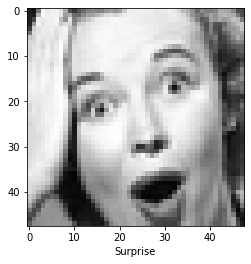

In [102]:
displayImage(df, classes)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
x_train, x_test, y_train, y_test = train_test_split(df['pixels'],
                                                    df['emotion'],
                                                    test_size=0.2,
                                                    random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28709,), (7178,), (28709,), (7178,))

In [158]:
clf = DummyClassifier()
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(f'Total baseline = {round(score * 100, 2)} %')

Total baseline = 16.47 %


In [94]:
x_train = np.vstack(x_train) / 255
x_test = np.vstack(x_test) / 255

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [167]:
model = Sequential([Dense(64, activation='relu', input_shape=x_train.shape[1:]),
                    Dense(32, activation='relu'),
                    Dense(7, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 231       
Total params: 149,831
Trainable params: 149,831
Non-trainable params: 0
_________________________________________________________________


In [168]:
stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train,
          y_train,
          validation_data=(x_test, y_test),
          epochs=100,
          batch_size=128,
          callbacks=[stop])

Train on 28709 samples, validate on 7178 samples
Epoch 1/100
28709/28709 [==============================] - 384s 13ms/sample - loss: 1.8321 - acc: 0.2357 - val_loss: 1.8100 - val_acc: 0.2459
Epoch 2/100
28709/28709 [==============================] - 3s 103us/sample - loss: 1.7998 - acc: 0.2516 - val_loss: 1.7874 - val_acc: 0.2459
Epoch 3/100
28709/28709 [==============================] - 3s 87us/sample - loss: 1.7752 - acc: 0.2598 - val_loss: 1.7610 - val_acc: 0.2793
Epoch 4/100
28709/28709 [==============================] - 2s 77us/sample - loss: 1.7461 - acc: 0.2834 - val_loss: 1.7267 - val_acc: 0.2843
Epoch 5/100
28709/28709 [==============================] - 2s 74us/sample - loss: 1.7169 - acc: 0.3051 - val_loss: 1.6997 - val_acc: 0.3153
Epoch 6/100
28709/28709 [==============================] - 2s 76us/sample - loss: 1.6947 - acc: 0.3232 - val_loss: 1.6846 - val_acc: 0.3278
Epoch 7/100
28709/28709 [==============================] - 2s 75us/sample - loss: 1.6799 - acc: 0.3364 - val

Epoch 59/100
28709/28709 [==============================] - 2s 72us/sample - loss: 1.5399 - acc: 0.4046 - val_loss: 1.5783 - val_acc: 0.3845
Epoch 60/100
28709/28709 [==============================] - 2s 72us/sample - loss: 1.5387 - acc: 0.4037 - val_loss: 1.5764 - val_acc: 0.3874
Epoch 61/100
28709/28709 [==============================] - 2s 82us/sample - loss: 1.5361 - acc: 0.4085 - val_loss: 1.5754 - val_acc: 0.3858
Epoch 62/100
28709/28709 [==============================] - 2s 80us/sample - loss: 1.5344 - acc: 0.4058 - val_loss: 1.5747 - val_acc: 0.3852
Epoch 63/100
28709/28709 [==============================] - 2s 81us/sample - loss: 1.5334 - acc: 0.4071 - val_loss: 1.5804 - val_acc: 0.3830
Epoch 64/100
28709/28709 [==============================] - 2s 78us/sample - loss: 1.5325 - acc: 0.4099 - val_loss: 1.5766 - val_acc: 0.3820
Epoch 65/100
28709/28709 [==============================] - 2s 78us/sample - loss: 1.5302 - acc: 0.4088 - val_loss: 1.5806 - val_acc: 0.3877


In [169]:
model.evaluate(x_test, y_test, verbose=0)

[1.5747044135946922, 0.3852048]

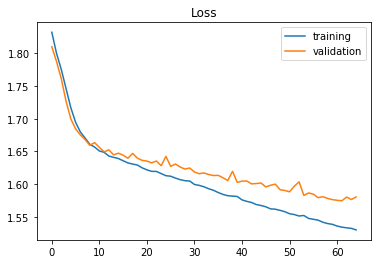

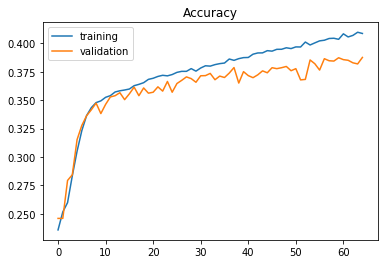

In [171]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.title('Accuracy')
plt.show()

In [180]:
def tryRandomExample():
    index = np.random.randint(0, x_test.shape[0])
    img = x_test[index]
    img = img.reshape(1, -1)
    pred = model.predict(img)
    best = np.argmax(pred[0])
    
    n = int(np.sqrt(img.shape[1]))
    plt.imshow(img[0].reshape(n, n), cmap='gray')
    print(classes[best] == classes[y_test[index]])
    print(f'Predicted label: {classes[best]}\nConfidence: {round(pred[0][best] * 100, 2)} %')
    print(f'Actual label: {classes[y_test[index]]}')
    
    

True
Predicted label: Happy
Confidence: 75.79 %
Actual label: Happy


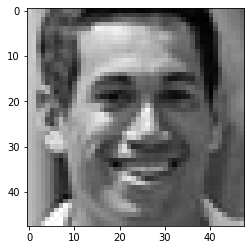

In [194]:
tryRandomExample()